In [10]:
from comp_metrics import *
from plot import *
from preprocessing import *
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')


/tmp/ipykernel_212555/777999581.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [19]:
df_huawei = read_huawei_blood_oxygen('/home/ubuntu/working-dir/huawei_data-proj/数据比较/data/raw/huawei_blood_oxygen.csv')
df_e66 = read_e66_blood_oxygen('/home/ubuntu/working-dir/huawei_data-proj/数据比较/data/raw/e66.json')
df_huawei_resample = resample_5t(df_huawei)
df_e66_resample = resample_5t(df_e66)

df_huawei

,value
time,
2022-05-18 01:54:25,98.62
2022-05-18 01:55:25,99.44
2022-05-18 01:56:25,99.56
2022-05-18 01:57:25,99.63
2022-05-18 01:58:25,99.18
...,...
2022-05-18 09:09:34,95.01
2022-05-18 09:10:34,95.82
2022-05-18 09:11:34,97.59


<AxesSubplot:xlabel='time'>

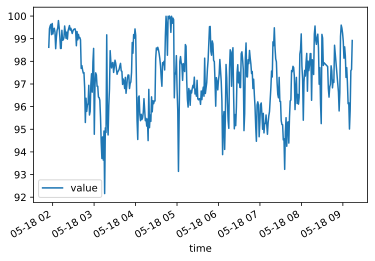

In [12]:
df_huawei.plot()

<AxesSubplot:xlabel='time'>

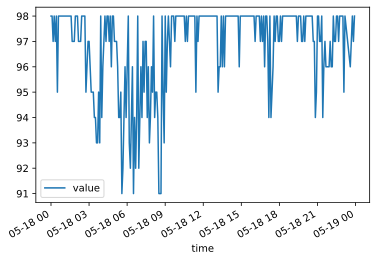

In [13]:
df_e66.plot()

In [14]:
df_e66_resample

,value
time,
2022-05-18 00:00:00,NaN
2022-05-18 00:05:00,98.0
2022-05-18 00:10:00,98.0
2022-05-18 00:15:00,97.0
2022-05-18 00:20:00,98.0
...,...
2022-05-18 23:35:00,98.0
2022-05-18 23:40:00,96.0
2022-05-18 23:45:00,97.0


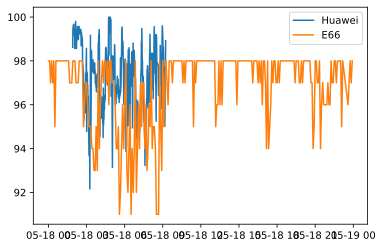

In [15]:
plt.plot(df_huawei.index, df_huawei[['value']], label = 'Huawei')
plt.plot(df_e66.index, df_e66[['value']], label = 'E66')
plt.legend()

In [16]:
merge_df = generate_merge_df(df_huawei_resample, df_e66_resample).dropna()
merge_df

,value1,value2
time,,
2022-05-18 01:55:00,98.62,97.0
2022-05-18 02:00:00,99.67,98.0
2022-05-18 02:05:00,98.56,98.0
2022-05-18 02:10:00,99.51,98.0
2022-05-18 02:15:00,98.93,97.0
...,...,...
2022-05-18 08:50:00,98.71,98.0
2022-05-18 08:55:00,95.81,95.0
2022-05-18 09:00:00,99.24,93.0


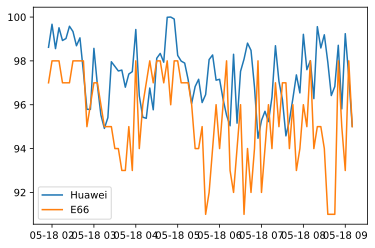

In [17]:
plt.plot(merge_df.index, merge_df[['value1']], label = 'Huawei')
plt.plot(merge_df.index, merge_df[['value2']], label = 'E66')
plt.legend()

In [18]:
huawei_array = merge_df['value1'].values
e66_array = merge_df['value2'].values

eclidean = calc_euclidean(huawei_array, e66_array)
mae = calc_mae(huawei_array, e66_array)
mape = calc_mape(huawei_array, e66_array)
cosine = calc_cosine(huawei_array, e66_array)
correlation = calc_correlation(huawei_array, e66_array)

print('Euclidean distance:', eclidean)
print('MAE:', mae)
print('MAPE:', mape)
print('Cosine similarity:', cosine)
print('Pearson correlation:', correlation)

Euclidean distance: 27.692300373930653
MAE: 2.295795454545454
MAPE: 0.02351712287483992
Cosine similarity: 0.9997261697021479
Pearson correlation: 0.2311381882117569
